In [1]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore') # Configuracion warnings

# Get data

In [23]:
arrests= sm.datasets.get_rdataset("USArrests", "datasets")
arrests

<class 'statsmodels.datasets.utils.Dataset'>

In [24]:
arrests.__dict__.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache', 'raw_data'])

In [25]:
arrests.raw_data.shape, arrests.data.shape

((50, 4), (50, 4))

In [33]:
arrests.title

'Violent Crime Rates by US State'

In [36]:
arrests.__doc__

'.. container::\n\n   ========= ===============\n   USArrests R Documentation\n   ========= ===============\n\n   .. rubric:: Violent Crime Rates by US State\n      :name: violent-crime-rates-by-us-state\n\n   .. rubric:: Description\n      :name: description\n\n   This data set contains statistics, in arrests per 100,000 residents\n   for assault, murder, and rape in each of the 50 US states in 1973.\n   Also given is the percent of the population living in urban areas.\n\n   .. rubric:: Usage\n      :name: usage\n\n   ::\n\n      USArrests\n\n   .. rubric:: Format\n      :name: format\n\n   A data frame with 50 observations on 4 variables.\n\n   ==== ======== ======= =============================\n   [,1] Murder   numeric Murder arrests (per 100,000)\n   [,2] Assault  numeric Assault arrests (per 100,000)\n   [,3] UrbanPop numeric Percent urban population\n   [,4] Rape     numeric Rape arrests (per 100,000)\n   ==== ======== ======= =============================\n\n   .. rubric:: Not

In [28]:
arrests.raw_data.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5


In [29]:
data = arrests.data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


## Checking out Missing values

In [90]:
data.isnull().sum().sum()

0

In [30]:
data.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


Before applying PCA, let define the mean and variance of variables

# First exploration

In [31]:
# mean
data.mean(axis=0)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [49]:
index1 = 'Murder'; index2 = 'Assault';
index3 = 'UrbanPop' ; index4 = 'Rape'

print("'Assault' Vs. 'Rape' ---> ", data.mean(axis=0)[index2] / data.mean(axis=0)[index4])
print("'Rape' Vs. 'Murder' ---> ", data.mean(axis=0)[index4] / data.mean(axis=0)[index1])

print("'UrbanPop' Vs. 'Murder' ---> ", data.mean(axis=0)[index3] / data.mean(axis=0)[index1])


'Assault' Vs. 'Rape' --->  8.042577241899023
'Rape' Vs. 'Murder' --->  2.726245505906522
'UrbanPop' Vs. 'Murder' --->  8.415511042629689


The mean of the variables shows that there are : 

* 8 times more assaults than kidnappings/Rape
* 3 times more kidnappings/Rape than murders 


In [50]:
# variance
data.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [ ]:
the Assault variable has a much higher mean and dispersion than the rest,
the Assault variable will dominate most of the principal components, with no scaling

In [ ]:
We need to standardize variables before conducting the PCA study

# Standardize data

In [57]:
# Scaling data
pca_pipe = make_pipeline(StandardScaler(), PCA())

# Training the PCA model 
pca_pipe.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [58]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [59]:
# Extracting the trained model from the pipeline
model_pca = pca_pipe.named_steps['pca']
model_pca

PCA()

In [63]:
print("shape   : ", model_pca.components_.shape)
model_pca.components_

shape   :  (4, 4)


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [64]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [70]:
# PCA dataframe
pca_dataframe = pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

pca_dataframe

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [71]:
pca_dataframe.index

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

The first component mostly collects the information corresponding to crimes/offenses (Murder, Assault, and Rape)
which are approximatively equal.

The second component mostly collects the information corresponding to UrbanPop
UrbanPop : the percent of the population living in urban areas

**The first component corresponds mainly to crimes**

**The second component corresponds mainly to the level of urbanization in the state.**

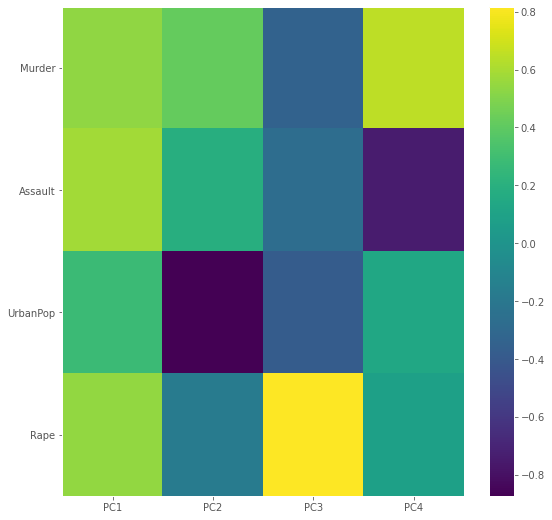

In [72]:
# Heatmap components
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
components = model_pca.components_
plt.imshow(components.T,  aspect='auto') # cmap='viridis'
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(datos.columns)), pca_dataframe.index)
plt.grid(False)
plt.colorbar();

# Variance ratio

[0.62006039 0.24744129 0.0891408  0.04335752]


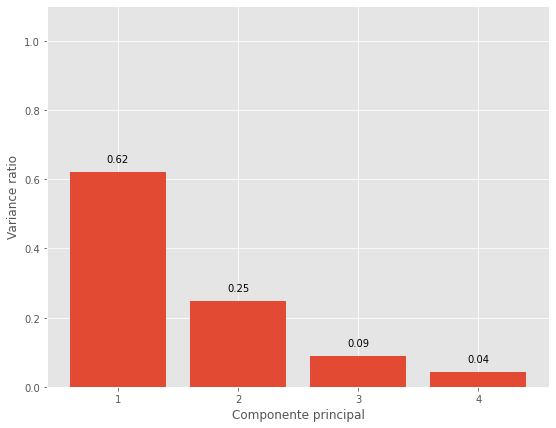

In [75]:
# variance ratio per each PCA component

print(model_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
ax.bar(
    x      = np.arange(model_pca.n_components_) + 1,
    height = model_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Componente principal')
ax.set_ylabel('Variance ratio');

The first component explains 62% of variance we observes en data
The second component explains 25%. 

[0.62006039 0.86750168 0.95664248 1.        ]


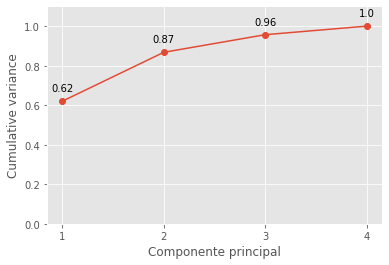

In [77]:
# Cumulative variance 
# ==============================================================================
cum_variance = model_pca.explained_variance_ratio_.cumsum()

print(cum_variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    cum_variance,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, cum_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xlabel('Componente principal')
ax.set_ylabel('Cumulative variance');

Based on PCA1 and PCA2, we would explain the variance of data (87%)

# Trasformation

## Using scaler product

In [86]:
proj = np.dot(model_pca.components_, scale(data).T)
proj = pd.DataFrame(proj, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proj = proj.transpose().set_index(data.index)
proj.head(3)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653


## Using transform() method 

We can reduce the dimensionality of new observations with the transform() method
by projecting them into the space defined by the components.

In [80]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [85]:
# Projecting
proj = pca_pipe.transform(X=data)
proj = pd.DataFrame(
    proj,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = data.index
)
proj.head(3)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653


#  Reconstruct projections

In [87]:
# Reconstruct 
reconstruct = pca_pipe.inverse_transform(X=proj)
reconstruct = pd.DataFrame(
                    reconstruct,
                    columns = data.columns,
                    index   = data.index
)
print('------------------')
print('Initial values')
print('------------------')
display(reconstruct.head())

print('---------------------')
print('Reconstructed values')
print('---------------------')
display(data.head())

------------------
Initial values
------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


---------------------
Reconstructed values
---------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
